# Encoding

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039274 sha256=ae173adb87b7ebab8195941ceb327b5a3ece6c57c2fab3301c1ec2437feb9548
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
df = "/content/gdrive/MyDrive/Ejercicios ciencia de datos/Comportamiento_compras.csv"

# EDA

In [ ]:
df = pd.read_csv(df)

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Ingeniería de atributos

## Dimensiones:

*  N/A

## Medidas:

*  Age
*  EstimatedSalary
*  Purchased

In [ ]:
#Normalizar los datos
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
# Código para poder visualizar los índices de Inercia (método del codo), Davies Bouldin, Silhouette y Calinski-Harabasz

sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano para el método de codo
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters) # Calculo del indice de Calinski-Harabasz

## Método del codo

In [ ]:
list(sse.keys())

[2, 3, 4, 5, 6, 7, 8, 9]

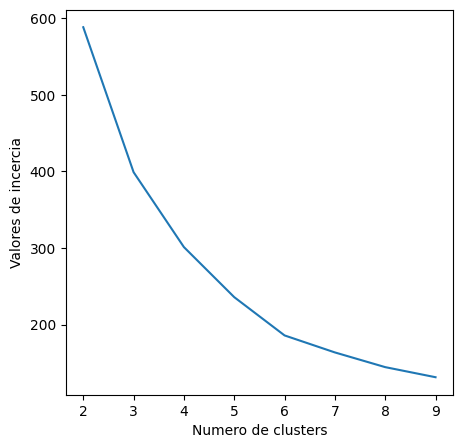

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Valores de incercia")
plt.show()

#### Según el método del codo el número de clusters es 6

##Davies-Bouldin Index

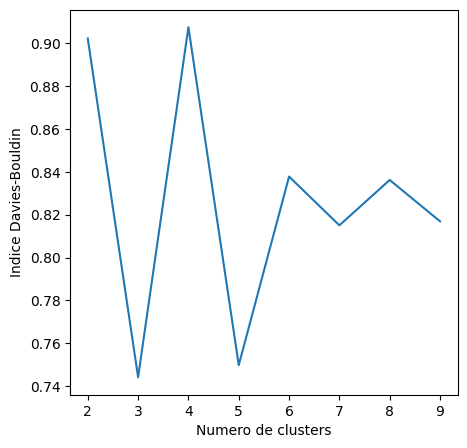

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

#### Según el método Davies-Bouldin Index el valor correcto es 3 (el más bajo)

##Silhouette

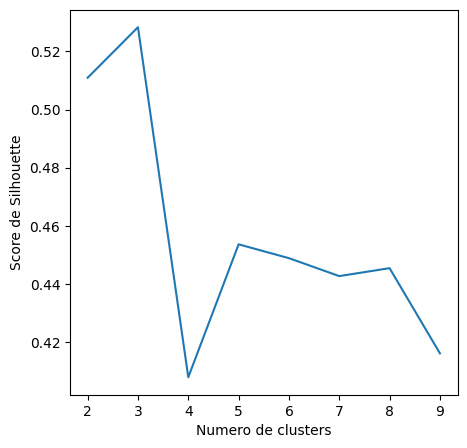

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

####Según el método de Silhouette el valor correcto es 3 (el más alto)

Para n_clusters = 2 El promedio del score de silhouette es:  0.5109337336711807
Para n_clusters = 3 El promedio del score de silhouette es:  0.5283294926196426
Para n_clusters = 4 El promedio del score de silhouette es:  0.40790225550841674
Para n_clusters = 5 El promedio del score de silhouette es:  0.45362803569602583
Para n_clusters = 6 El promedio del score de silhouette es:  0.44886994818888326
Para n_clusters = 7 El promedio del score de silhouette es:  0.4426946779138128
Para n_clusters = 8 El promedio del score de silhouette es:  0.44542589768611557
Para n_clusters = 9 El promedio del score de silhouette es:  0.41612327507573643


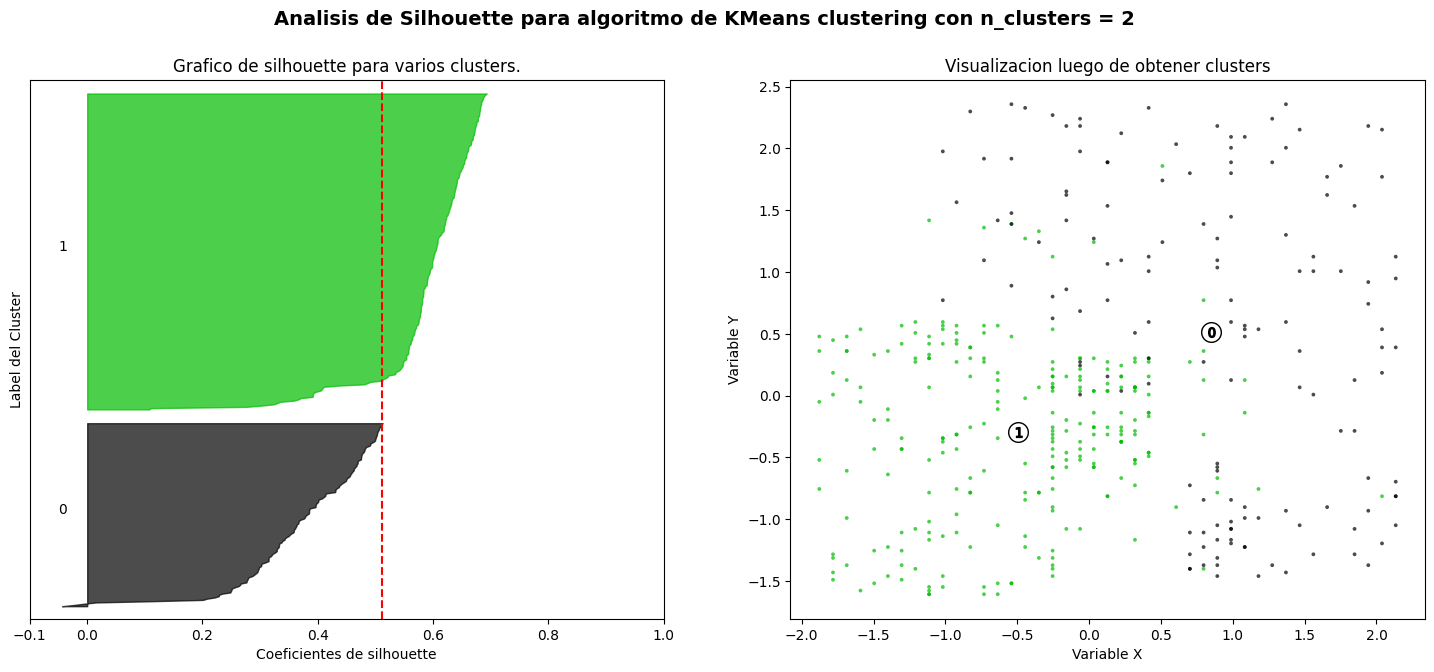

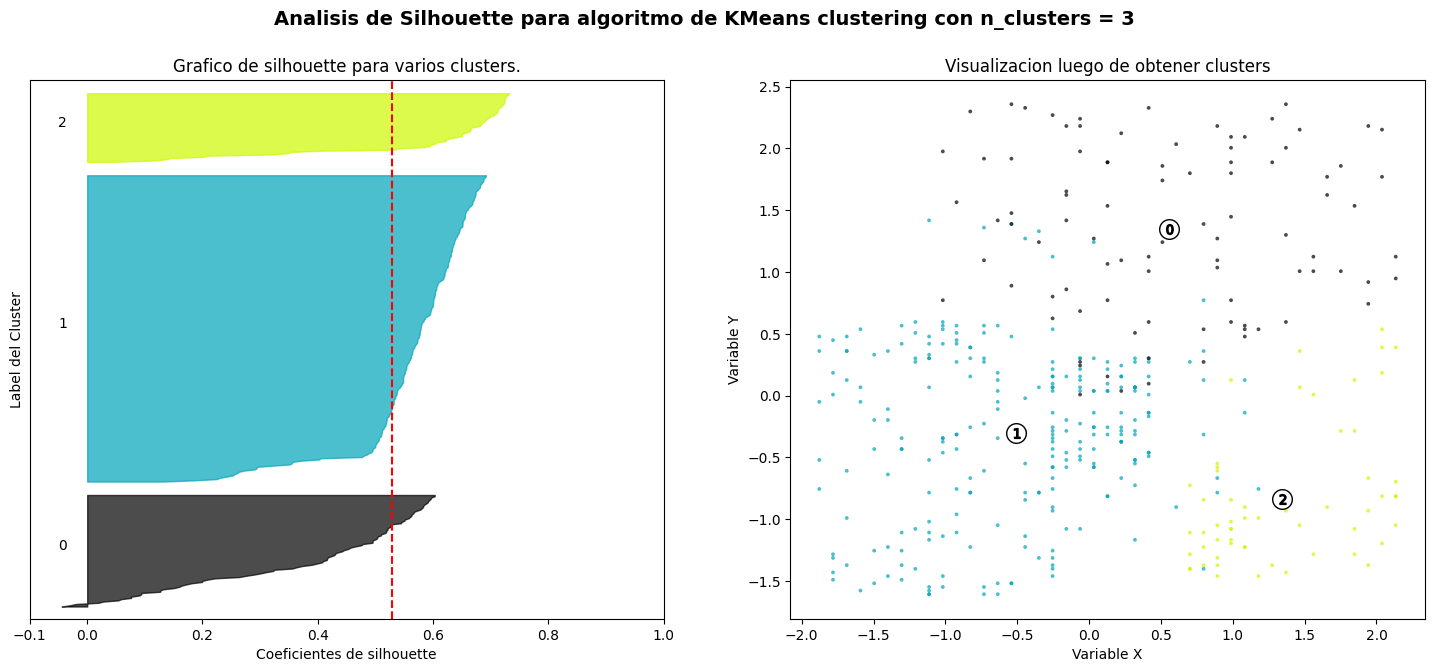

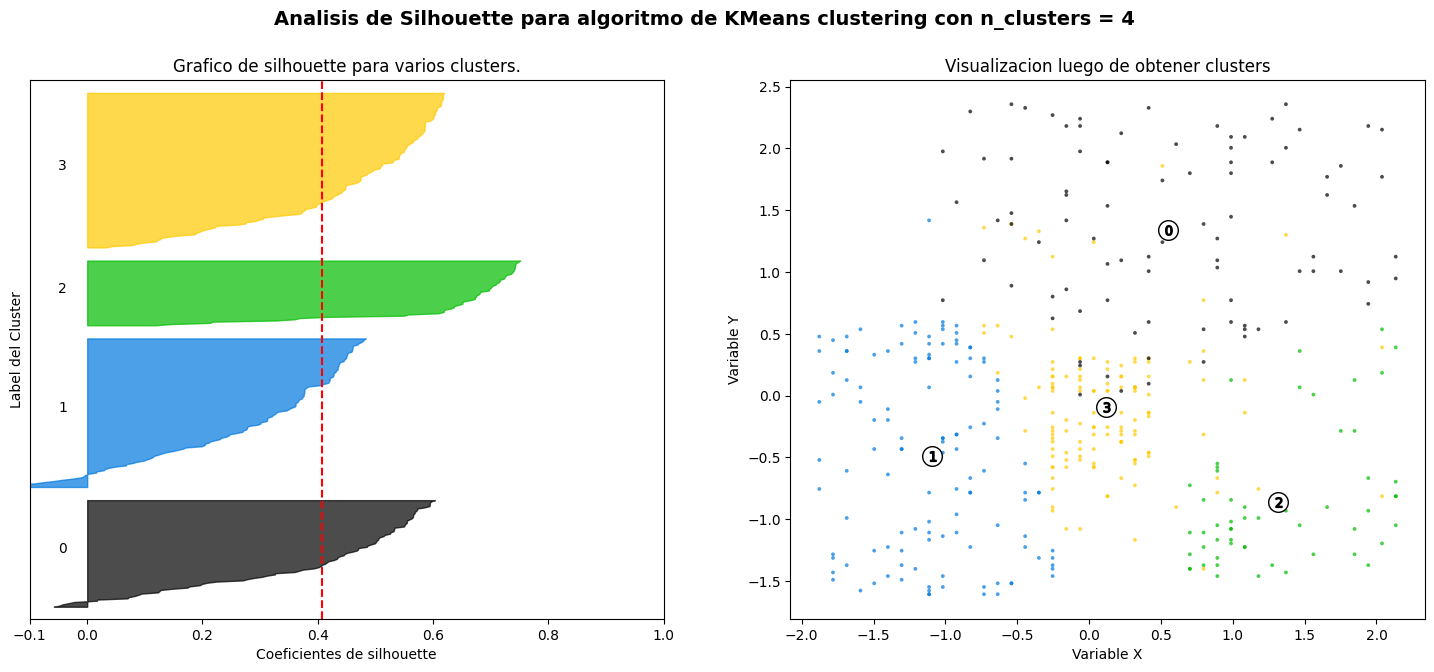

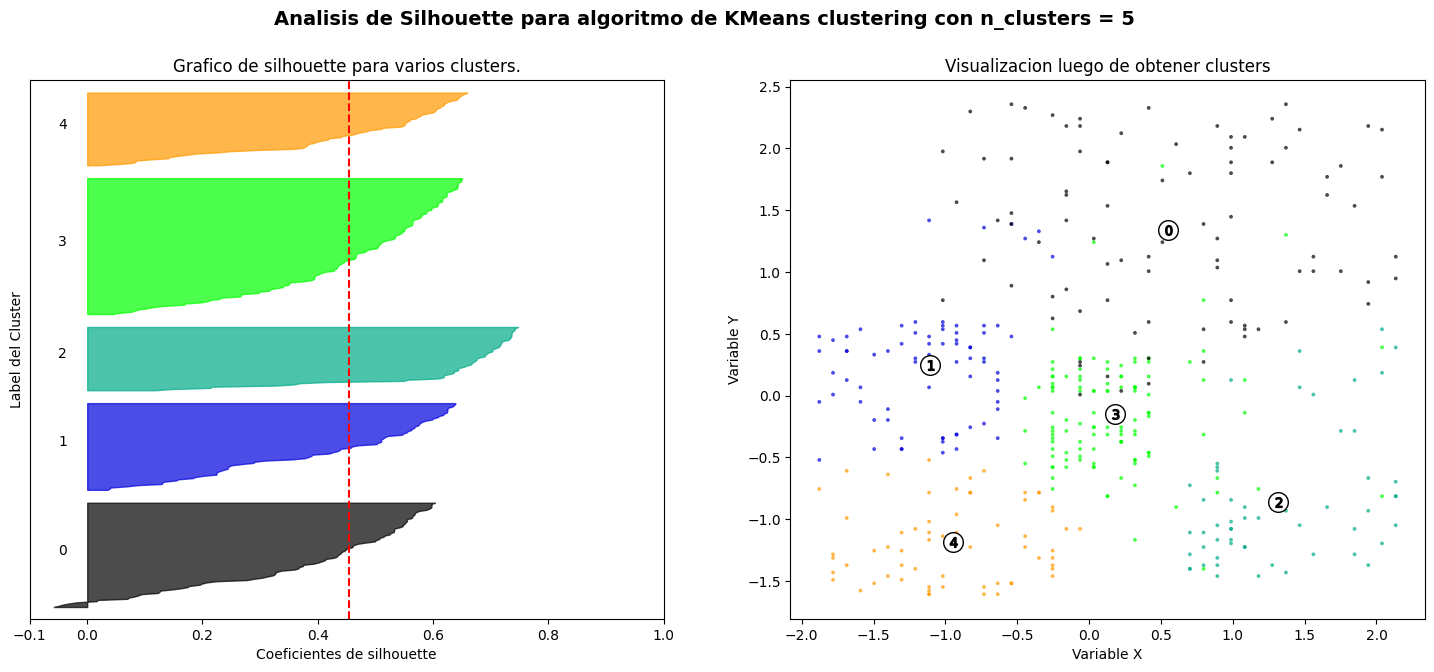

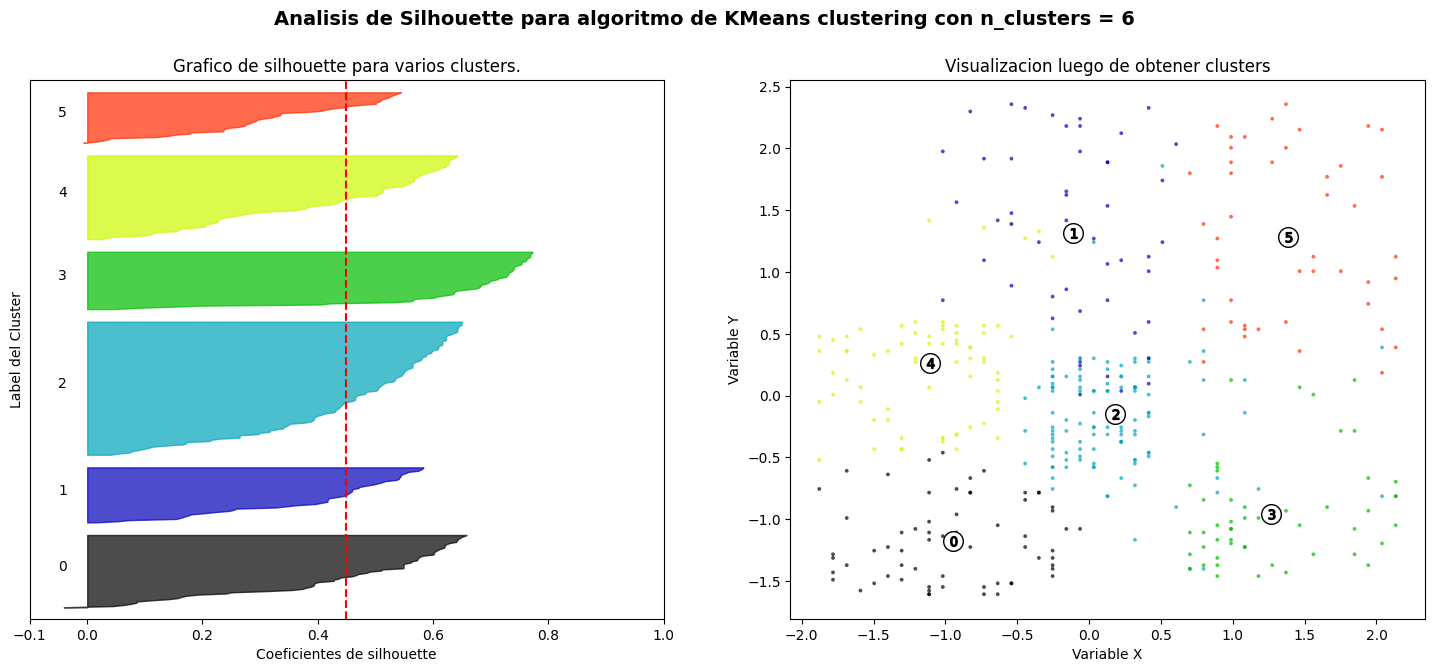

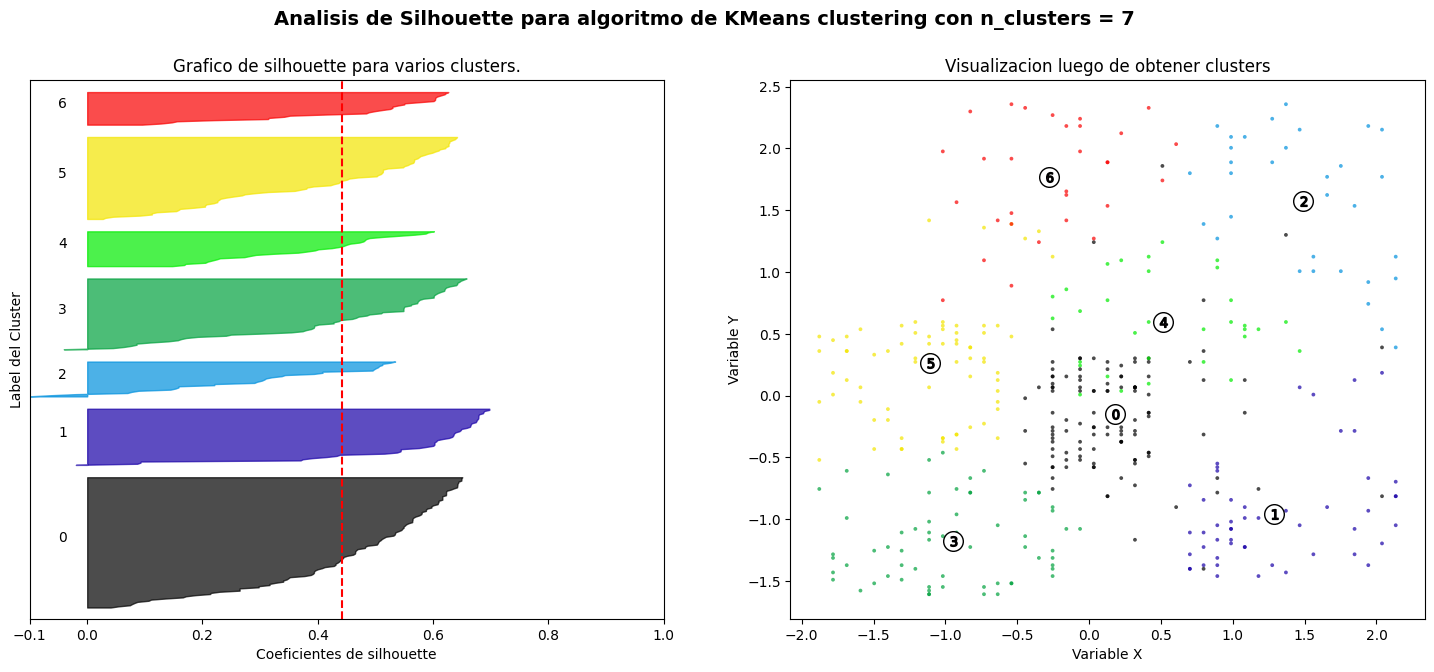

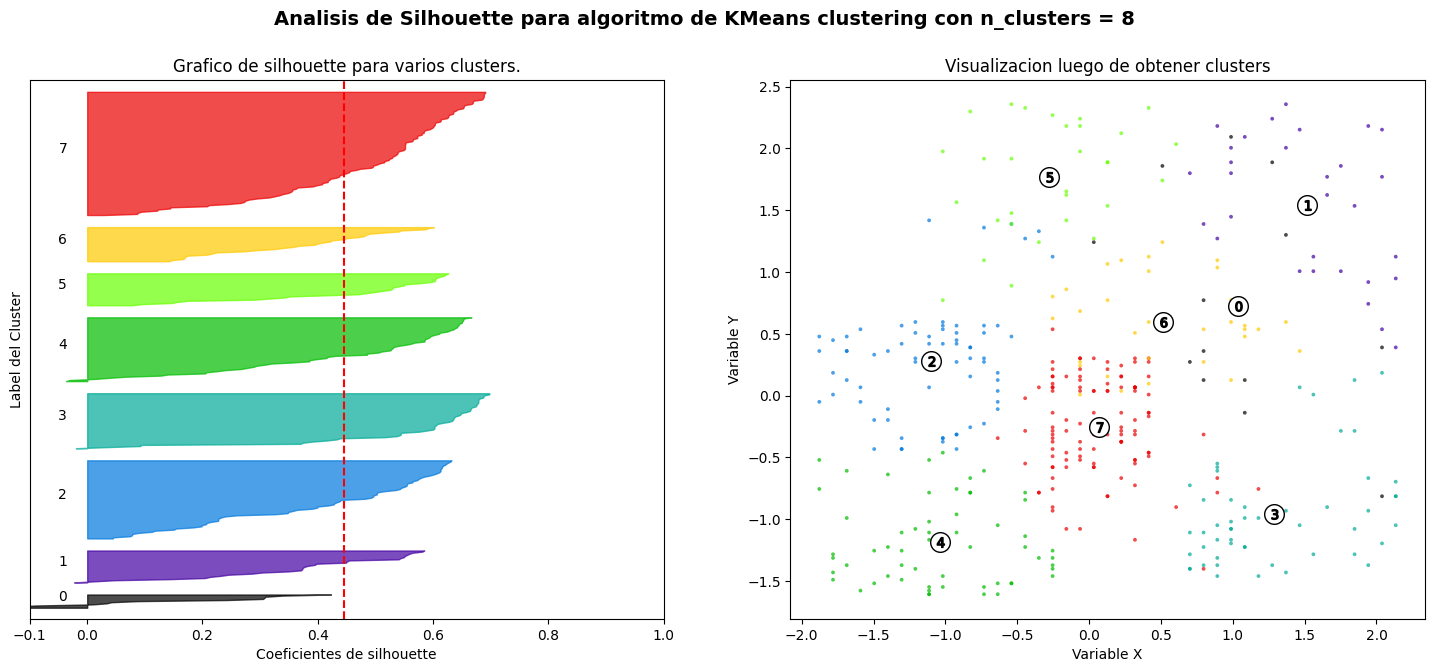

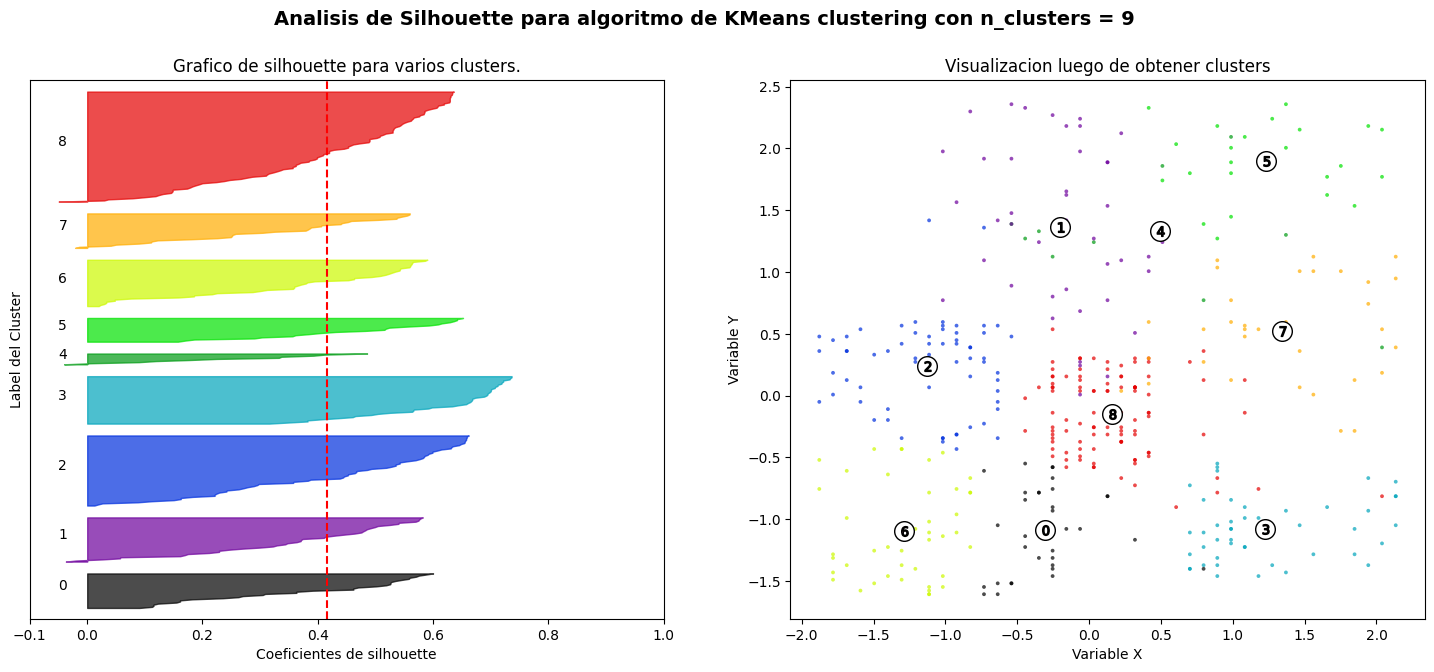

In [ ]:
for n_clusters in range(2, 10):

    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)

    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion
# 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

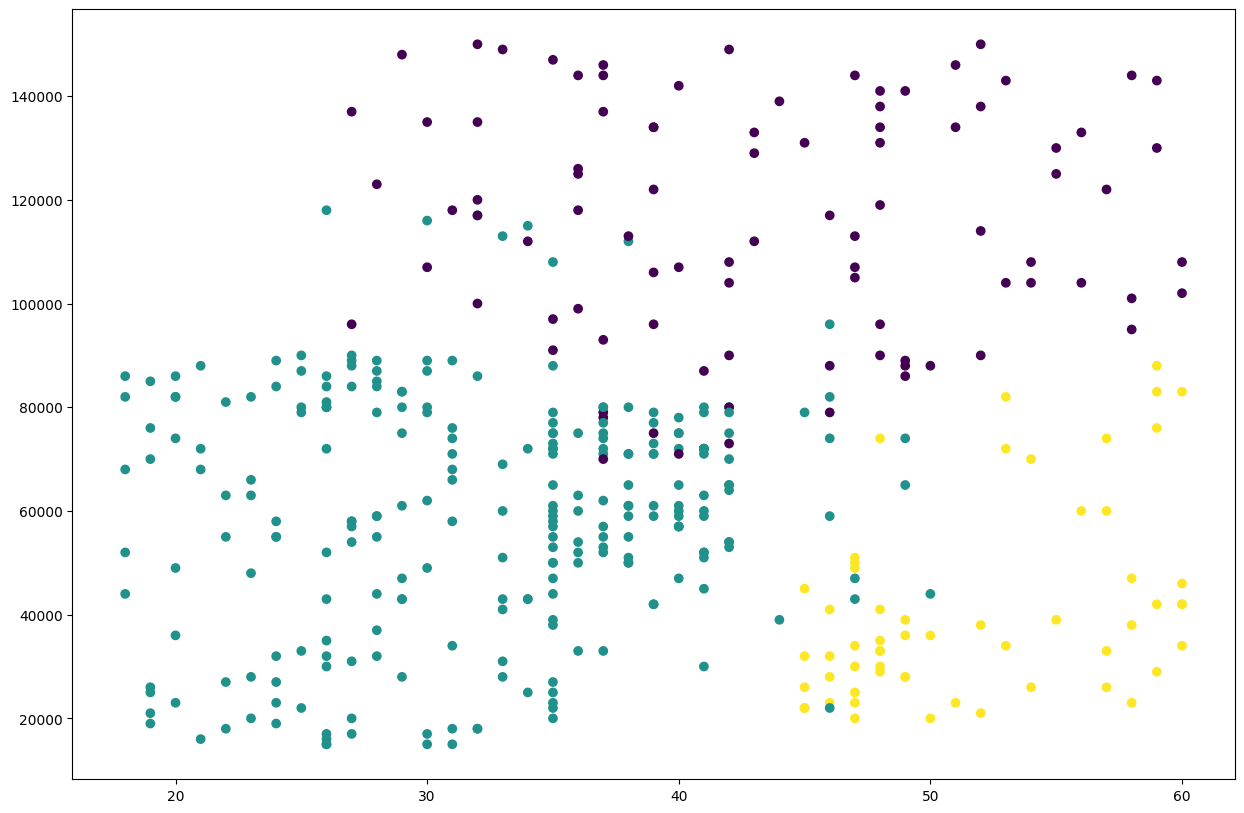

In [ ]:
#Graficar los clusters sin datos normalizados

#Desnormalizamos los datos
X = sc.inverse_transform(X)

#Gráfica con etiquetas de k = 3 clusteres
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

# Conclusión

### Se necesitan más datos para poder llegar a una conclusión, los clustering no son claros

# Se analiza de otra forma

In [ ]:
#Seleccionar las features para el análisis
features = df[['Age', 'EstimatedSalary']]

#Escalar las características para normalizar
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

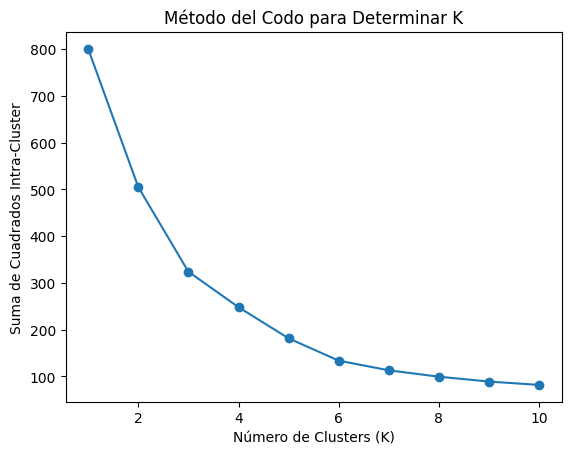

In [ ]:
#Método de codo
sum_of_squares = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled) #Atributos escalados
    sum_of_squares.append(kmeans.inertia_)

# Visualizar la curva del codo
plt.plot(k_values, sum_of_squares, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Cuadrados Intra-Cluster')
plt.show()

####Se deduce que el número de clusters es 4

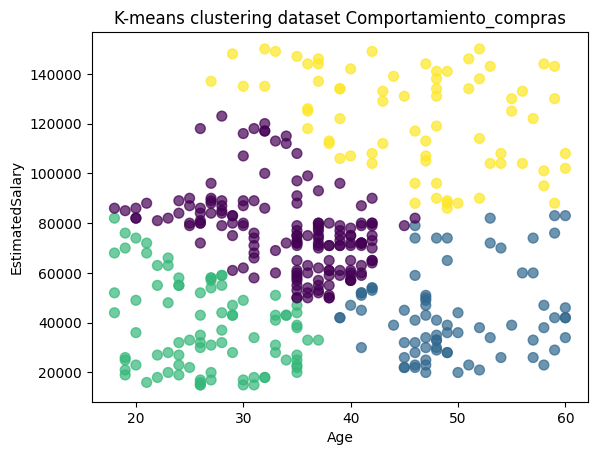

In [ ]:
#Aplicar kmeans con k optimo 4
kmeans = KMeans(n_clusters=4, random_state=42)
#Hacemos el fit de los datos
kmeans_labels = kmeans.fit_predict(features_scaled)

#Crear scatter plot
plt.scatter(features['Age'], features['EstimatedSalary'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means clustering dataset Comportamiento_compras')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

# Conclusión

### Se necesitan más datos para poder llegar a una conclusión, los clustering no son claros

# Se usa el método de densidad o de DBSCAN

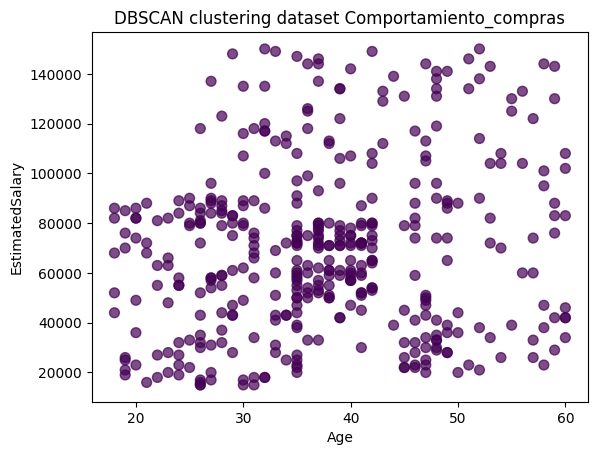

Cantidad de clusters únicos: 0
Cantidad de puntos de ruido: 400


In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan_clusterer = DBSCAN(min_samples=10)
dbscan_labels = dbscan_clusterer.fit_predict(features)

# Visualizar el scatter plot con etiquetas de clusters
plt.scatter(features['Age'], features['EstimatedSalary'], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN clustering dataset Comportamiento_compras')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

#Contabilizar la cantidad de clusters y el ruido
unique_clusters = np.unique(dbscan_labels[dbscan_labels != -1])

# Obtener cantidad de puntos de ruido (etiquetados como -1)
noise_points = np.sum(dbscan_labels == -1)

print("Cantidad de clusters únicos:", len(unique_clusters))
print("Cantidad de puntos de ruido:", noise_points)